In [375]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [376]:
data = loadmat('sat-4-full.mat')

In [377]:
train_x = data['train_x']

In [378]:
train_x.shape

(28, 28, 4, 400000)

In [379]:
ab = np.array([1,2,3,4,5,6,7,8,9,10,11,12]).reshape(3,2,2)

In [380]:
ab

array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]]])

In [381]:
ab.reshape(2,3,2)

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6]],

       [[ 7,  8],
        [ 9, 10],
        [11, 12]]])

In [382]:
train_xx = train_x.T

In [383]:
train_xx = train_xx.reshape(400000,4,784)

In [384]:
train_xx.shape

(400000, 4, 784)

In [385]:
train_xxx = train_xx.reshape(400000,3136)

In [386]:
from sklearn.svm import SVC

In [387]:
train_y = np.argmax(data['train_y'],axis = 0)

In [388]:
train_y.shape

(400000,)

In [389]:
c = np.array([12,3,4,5,6,7,8,9]).reshape(4,2)

In [390]:
c

array([[12,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9]])

In [391]:
np.mean(c,axis=1)

array([7.5, 4.5, 6.5, 8.5])

In [392]:
data = np.zeros((400000,1))

In [393]:
data.shape

(400000, 1)

In [394]:
train_xx[:,0,:].shape

(400000, 784)

In [395]:
new_train = np.zeros((400000,1))

In [396]:
for i in range(4):
    stack = np.mean(train_xx[:,i,:],axis = 1).reshape(400000,-1)
    print(stack.shape)
    print(data.shape)
    data = np.hstack((data,stack))
    
print(data.shape)

(400000, 1)
(400000, 1)
(400000, 1)
(400000, 2)
(400000, 1)
(400000, 3)
(400000, 1)
(400000, 4)
(400000, 5)


In [397]:
data = data[:,1:]

In [398]:
data


array([[108.70280612, 109.71556122, 104.05612245, 147.09311224],
       [165.44132653, 144.09311224, 127.49872449, 145.09566327],
       [ 82.5880102 ,  84.83673469,  80.43112245, 121.92984694],
       ...,
       [124.45408163, 123.70918367, 103.20663265, 170.6747449 ],
       [ 88.28316327,  93.89668367,  82.35459184, 155.125     ],
       [107.90816327, 106.64795918,  98.25255102, 143.12755102]])

In [399]:
data[1,0:3].flatten()

array([165.44132653, 144.09311224, 127.49872449])

In [400]:

import colorsys
x = []

In [401]:
for i in range(data.shape[0]):
    x.append(colorsys.rgb_to_hsv(data[i,0],data[i,1],data[i,2]))
    
x = np.array(x).reshape(400000,3)
data = np.hstack((data,x))

In [402]:
data.shape

(400000, 7)

In [403]:
## Calculating the NIR std

data = np.hstack((data,np.std(train_xx[:,3,:],axis = 1).reshape(400000,-1)))

In [404]:
data.shape

(400000, 8)

In [405]:
## NDVI Computing

ndvi = np.divide(np.subtract(data[:,3],data[:,0]),np.add(data[:,3],data[:,0])).reshape(400000,-1)
data = np.hstack((data,ndvi))

In [406]:
## ARVI computing

arvi = np.divide(np.subtract(data[:,3],2*np.subtract(data[:,0],data[:,2])),np.subtract(data[:,3],2*np.add(data[:,0],data[:,2])))

data = np.hstack((data,arvi.reshape(400000,-1)))


In [407]:
data.shape

(400000, 10)

In [128]:
np.savetxt('ece2720data1.csv',data,delimiter = ',')

In [408]:
trainacclist = []
valacclist = []

c = [np.float_power(10,i) for i in np.arange(-3,8) ]

for i in c:
    
    svm = SVC(C = i, kernel = 'rbf', degree = 3)
    svm.fit(data[:5000],train_y[:5000])
    trainacc = svm.score(data[:5000],train_y[:5000])
    valacc = svm.score(data[50000:100000],train_y[50000:100000])
    trainacclist.append(trainacc)
    valacclist.append(valacc)
    print('For the C value of {}, the training accuracy was {} and validation accuracy was {}'.format(i,trainacc,valacc))

    
    

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 0.001, the training accuracy was 0.3662 and validation accuracy was 0.35582


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 0.01, the training accuracy was 0.3662 and validation accuracy was 0.35582


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 0.1, the training accuracy was 0.369 and validation accuracy was 0.35658


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 1.0, the training accuracy was 0.9988 and validation accuracy was 0.84146


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 10.0, the training accuracy was 1.0 and validation accuracy was 0.85106


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 100.0, the training accuracy was 1.0 and validation accuracy was 0.85106


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 1000.0, the training accuracy was 1.0 and validation accuracy was 0.85106


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 10000.0, the training accuracy was 1.0 and validation accuracy was 0.85106


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 100000.0, the training accuracy was 1.0 and validation accuracy was 0.85106


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 1000000.0, the training accuracy was 1.0 and validation accuracy was 0.85106


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 10000000.0, the training accuracy was 1.0 and validation accuracy was 0.85106


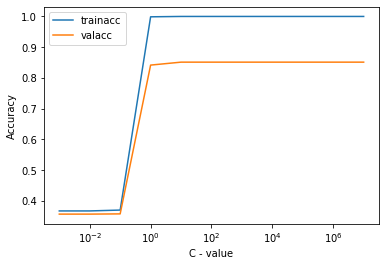

In [410]:
plt.semilogx(c,trainacclist, label = 'trainacc')
plt.semilogx(c,valacclist, label = 'valacc')
plt.legend()
plt.xlabel('C - value')
plt.ylabel('Accuracy')
plt.show()


In [411]:
svm.get_params()

{'C': 10000000.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [412]:
## FOR DATASET OF 20000


In [413]:
trainacclist = []
valacclist = []

c = [np.float_power(10,i) for i in np.arange(-3,8) ]

for i in c:
    
    svm = SVC(C = i, kernel = 'rbf', degree = 3)
    svm.fit(data[:20000],train_y[:20000])
    trainacc = svm.score(data[:20000],train_y[:20000])
    valacc = svm.score(data[50000:100000],train_y[50000:100000])
    trainacclist.append(trainacc)
    valacclist.append(valacc)
    print('For the C value of {}, the training accuracy was {} and validation accuracy was {}'.format(i,trainacc,valacc))

    

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 0.001, the training accuracy was 0.354 and validation accuracy was 0.35582


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 0.01, the training accuracy was 0.354 and validation accuracy was 0.35582


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 0.1, the training accuracy was 0.7538 and validation accuracy was 0.66298


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 1.0, the training accuracy was 0.9978 and validation accuracy was 0.93696


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 10.0, the training accuracy was 0.9999 and validation accuracy was 0.93804


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 100.0, the training accuracy was 1.0 and validation accuracy was 0.93768


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 1000.0, the training accuracy was 1.0 and validation accuracy was 0.93768


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 10000.0, the training accuracy was 1.0 and validation accuracy was 0.93768


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 100000.0, the training accuracy was 1.0 and validation accuracy was 0.93768


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 1000000.0, the training accuracy was 1.0 and validation accuracy was 0.93768


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


For the C value of 10000000.0, the training accuracy was 1.0 and validation accuracy was 0.93768


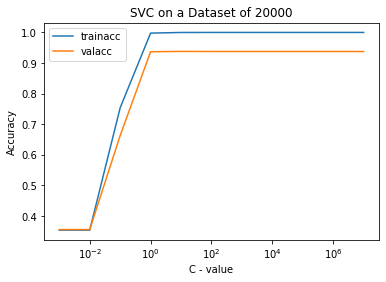

In [415]:
plt.semilogx(c,trainacclist, label = 'trainacc')
plt.semilogx(c,valacclist, label = 'valacc')
plt.legend()
plt.xlabel('C - value')
plt.ylabel('Accuracy')
plt.title('SVC on a Dataset of 20000')
plt.show()


In [239]:
data.shape

(400000, 10)

In [240]:
### After Standardizing the Data for the C value with max validation score 


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_norm = scaler.fit_transform(data[:300000])
test_norm = scaler.transform(data[300000:])

svm_norm = SVC(C=10, kernel= 'rbf', degree = 3)
svm_norm.fit(train_norm,train_y[:300000])
train_score = svm_norm.score(train_norm,train_y[:300000])
test_score = svm_norm.score(test_norm,train_y[300000:])


print('The training acc is {} and the testing acc is {}'.format(train_score,test_score))


The training acc is 0.97703 and the testing acc is 0.97717


In [241]:
import pickle
pickle.dump(svm_norm,open('svm_model_1.sav','wb'))

In [92]:
data = np.delete(data,8,axis = 1)
data[1]

array([ 1.65441327e+02,  1.44093112e+02,  1.27498724e+02,  1.45095663e+02,
        7.28925046e-02,  2.29341742e-01,  1.65441327e+02,  1.25512127e+01,
       -1.57016567e-01])

In [93]:
data.shape

(399998, 9)

In [71]:
### Finding Feature Contribution using SVM linear kernel


from matplotlib import pyplot as plt
from sklearn import svm



features_names = ['Red Mean', 'Green Mean', 'Blue Mean', 'NIR Mean','Hue Mean', 'S Mean','V Mean', 'NIR Std', 'NDVI','ARVI']
svm = svm.SVC(C = 10, kernel='linear')
svm.fit(train_norm, train_y[:150000])


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

array([[ -2.17267431,   2.48453456,   1.34775787,  -1.6802915 ,
         -0.25569675,   0.93852046,   2.12501664,  -1.6519067 ,
         -0.49566039,  -0.49566039,   0.60966216],
       [ 12.74596083,   1.83282974, -16.34684939, -10.22322909,
          0.18994341,  -4.32597477,  20.43554281,   0.270626  ,
          7.30611146,   7.30611146,   1.9065578 ],
       [ -7.80521248,   1.87166045, -12.56255929,   1.97081082,
          0.1322713 ,  -3.79722053,  17.60813731,  -1.66028592,
          1.36744968,   1.36744968,  10.84115664],
       [  6.09815014,  -5.1818076 ,  -3.3074807 ,  -3.52251815,
          0.54869601,  -2.40289103,   8.64078273,   2.62544469,
          4.1188332 ,   4.1188332 ,   1.04443978],
       [  0.49509496,   1.98889508,  -7.5071954 ,   4.77798314,
          0.23643305,  -1.13406935,  -7.41756876,   2.68467977,
         -0.95002308,  -0.95002308,  -0.02706044],
       [ -3.33468198,  -0.02950263,  -3.65897798,   1.98141705,
         -0.34463994,   0.29270277,   4.9

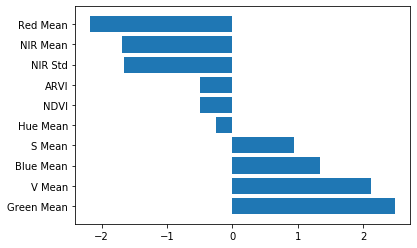

In [77]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()
features = ['Red Mean', 'Green Mean', 'Blue Mean', 'NIR Mean','Hue Mean', 'S Mean','V Mean', 'NIR Std', 'NDVI','ARVI']
f_importances(svm.coef_[0], features, top=10)

In [78]:
svm.score(train_norm, train_y[:150000])

0.9438533333333333

In [79]:
np.savetxt('ece2720data.csv',data,delimiter = ',')

In [81]:
import pickle
pickle.dump(svm_norm,open('svm_model.sav','wb'))


In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [130]:
solver = ['lbgfs','newton_cg']
penalty = ['l1','l2']

train_norm = scaler.fit_transform(data[:150000])
test_norm = scaler.transform(data[150000:])

log = LogisticRegression(penalty = 'l2', solver = 'lbfgs')
log.fit(train_norm,train_y[:150000])


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
data.shape

(400000, 10)

In [132]:
log.score(train_norm,train_y[:150000])

0.9165

In [134]:
test_norm.shape

(250000, 10)

In [135]:
log.score(test_norm,train_y[150000:])

0.9172

In [292]:
solver = ['sag','newton-cg']
penalty = ['none','l2']

train_norm = scaler.fit_transform(data[:300000])
test_norm = scaler.transform(data[300000:])

i = 1
labels = []
train_Acc = []
test_Acc = []

for s in solver:
    for p in penalty:
        log = LogisticRegression(penalty = p, solver = s, max_iter = 500)
        log.fit(train_norm,train_y[:300000])
        train_Acc.append(log.score(train_norm,train_y[:300000]))
        test_Acc.append(log.score(test_norm,train_y[300000:]))
        labels.append(s+' with '+p+' penalty ')
plt.show()

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


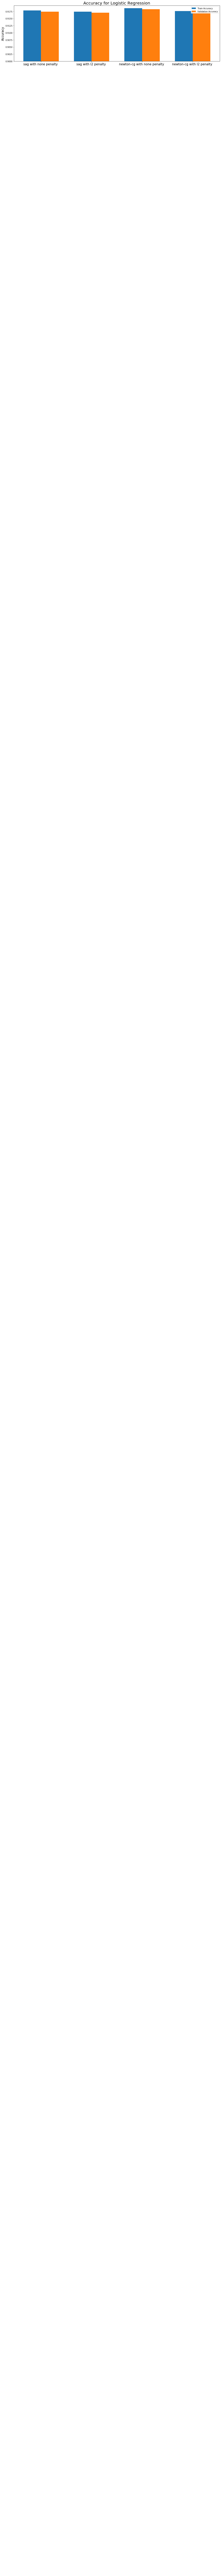

In [293]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np



x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (18,5))
rects1 = ax.bar(x - width/2, np.subtract(train_Acc,.9), width, label='Train Accuracy', bottom = .9)
rects2 = ax.bar(x + width/2, np.subtract(test_Acc,.9), width, label='Validation Accuracy', bottom = .9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy', fontsize = 15)
ax.set_title('Accuracy for Logistic Regression', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 15)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [169]:
### Trying MLP Classifier

from sklearn.neural_network import MLPClassifier

solver = ['adam','sgd','lbfgs']
activation = ['tanh','relu','logistic']
hidden_layer = [(5,5,5)]

train_norm = scaler.fit_transform(data[:300000])
test_norm = scaler.transform(data[300000:])

i = 1
labels = []
train_Acc = []
test_Acc = []
loss = []

for s in solver:
    for a in activation:
        for h in hidden_layer:
            mlp = MLPClassifier(solver = s, activation = a, hidden_layer_sizes = h)
            mlp.fit(train_norm,train_y[:300000])
            train_Acc.append(mlp.score(train_norm,train_y[:300000]))
            test_Acc.append(mlp.score(test_norm,train_y[300000:]))
            labels.append('solver '+ s + ' with ' + 'Activation Fn ' + a)
            

//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [200]:
labels

['solver lbfgs with Activation Fn tanh',
 'solver lbfgs with Activation Fn relu',
 'solver lbfgs with Activation Fn logistic',
 'solver adam with Activation Fn tanh',
 'solver adam with Activation Fn relu',
 'solver adam with Activation Fn logistic',
 'solver sgd with Activation Fn tanh',
 'solver sgd with Activation Fn relu',
 'solver sgd with Activation Fn logistic']

In [210]:


stopwords = ['solver','Activation', 'Fn']

new = []
for label in labels:
    print(label.split())
    x = [word for word in label.split() if word not in stopwords]
    new.append(' '.join(x))
        


['solver', 'lbfgs', 'with', 'Activation', 'Fn', 'tanh']
['solver', 'lbfgs', 'with', 'Activation', 'Fn', 'relu']
['solver', 'lbfgs', 'with', 'Activation', 'Fn', 'logistic']
['solver', 'adam', 'with', 'Activation', 'Fn', 'tanh']
['solver', 'adam', 'with', 'Activation', 'Fn', 'relu']
['solver', 'adam', 'with', 'Activation', 'Fn', 'logistic']
['solver', 'sgd', 'with', 'Activation', 'Fn', 'tanh']
['solver', 'sgd', 'with', 'Activation', 'Fn', 'relu']
['solver', 'sgd', 'with', 'Activation', 'Fn', 'logistic']


In [211]:
new

['lbfgs with tanh',
 'lbfgs with relu',
 'lbfgs with logistic',
 'adam with tanh',
 'adam with relu',
 'adam with logistic',
 'sgd with tanh',
 'sgd with relu',
 'sgd with logistic']

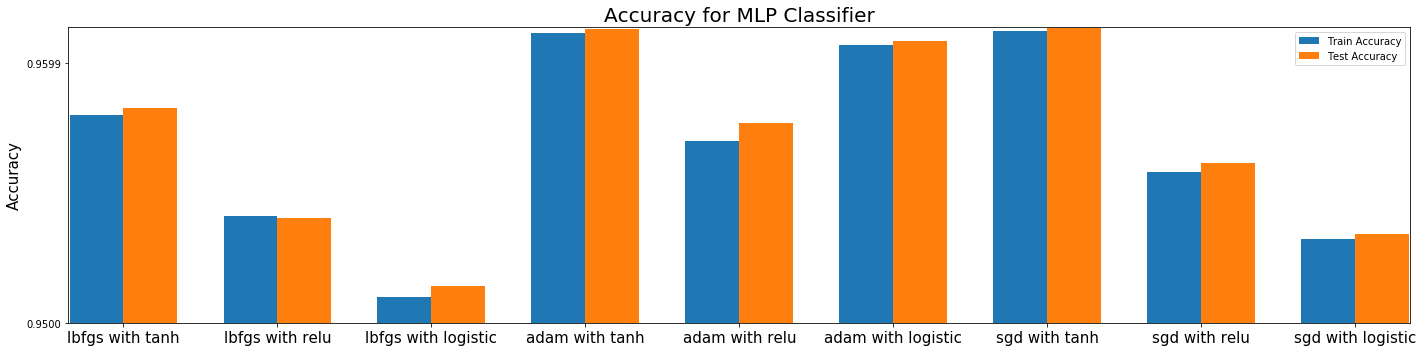

In [228]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np



x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (20,5))
rects1 = ax.bar(x - width/2, np.subtract(train_Acc,.95), width, label='Train Accuracy', bottom = .95)
rects2 = ax.bar(x + width/2, np.subtract(test_Acc,.95), width, label='Test Accuracy', bottom = .95)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy', fontsize = 15)
ax.margins(.001)
ax.set_title('Accuracy for MLP Classifier', fontsize = 20)
ax.set_yticks(np.arange(.95,.969,.0099))
ax.set_xticks(x)
ax.set_xticklabels(new, fontsize = 15)
ax.legend()


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{0:.3f}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()

In [229]:
train_Acc

[0.9579,
 0.9540566666666667,
 0.9509933333333334,
 0.9610466666666667,
 0.9569166666666666,
 0.96059,
 0.9610966666666667,
 0.9557366666666667,
 0.95318]

In [230]:
test_Acc

[0.95817, 0.95401, 0.95139, 0.9612, 0.9576, 0.96073, 0.96124, 0.9561, 0.95339]

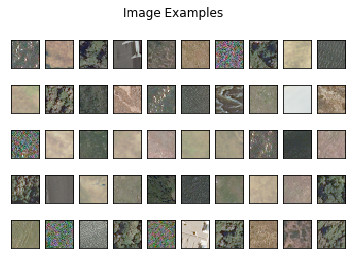

In [289]:
for i in range(50):
    l1_plot = plt.subplot(5, 10, i + 1)
    l1_plot.imshow(train_x[:,:,0:3,i])
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
#     l1plot.set_xlabel(func(i))
    #l1_plot.set_xlabel('Class %s' % y_test[i].decode())
    
plt.suptitle('Image Examples')
plt.show()

In [242]:
from sklearn.neural_network import MLPClassifier

solver = ['adam','sgd','lbfgs']
activation = ['tanh','relu','logistic']
hidden_layer = [(20,20,20)]

train_norm = scaler.fit_transform(data[:300000])
test_norm = scaler.transform(data[300000:])

i = 1
labels = []
train_Acc = []
test_Acc = []
loss = []

for s in solver:
    for a in activation:
        for h in hidden_layer:
            mlp = MLPClassifier(solver = s, activation = a, hidden_layer_sizes = h)
            mlp.fit(train_norm,train_y[:300000])
            train_Acc.append(mlp.score(train_norm,train_y[:300000]))
            test_Acc.append(mlp.score(test_norm,train_y[300000:]))
            labels.append('solver '+ s + ' with ' + 'Activation Fn ' + a)
            print('Working')

Working
Working


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Working


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Working


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Working


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Working
Working
Working
Working


In [243]:
stopwords = ['solver','Activation', 'Fn']

new = []
for label in labels:
    print(label.split())
    x = [word for word in label.split() if word not in stopwords]
    new.append(' '.join(x))
        

['solver', 'adam', 'with', 'Activation', 'Fn', 'tanh']
['solver', 'adam', 'with', 'Activation', 'Fn', 'relu']
['solver', 'adam', 'with', 'Activation', 'Fn', 'logistic']
['solver', 'sgd', 'with', 'Activation', 'Fn', 'tanh']
['solver', 'sgd', 'with', 'Activation', 'Fn', 'relu']
['solver', 'sgd', 'with', 'Activation', 'Fn', 'logistic']
['solver', 'lbfgs', 'with', 'Activation', 'Fn', 'tanh']
['solver', 'lbfgs', 'with', 'Activation', 'Fn', 'relu']
['solver', 'lbfgs', 'with', 'Activation', 'Fn', 'logistic']


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


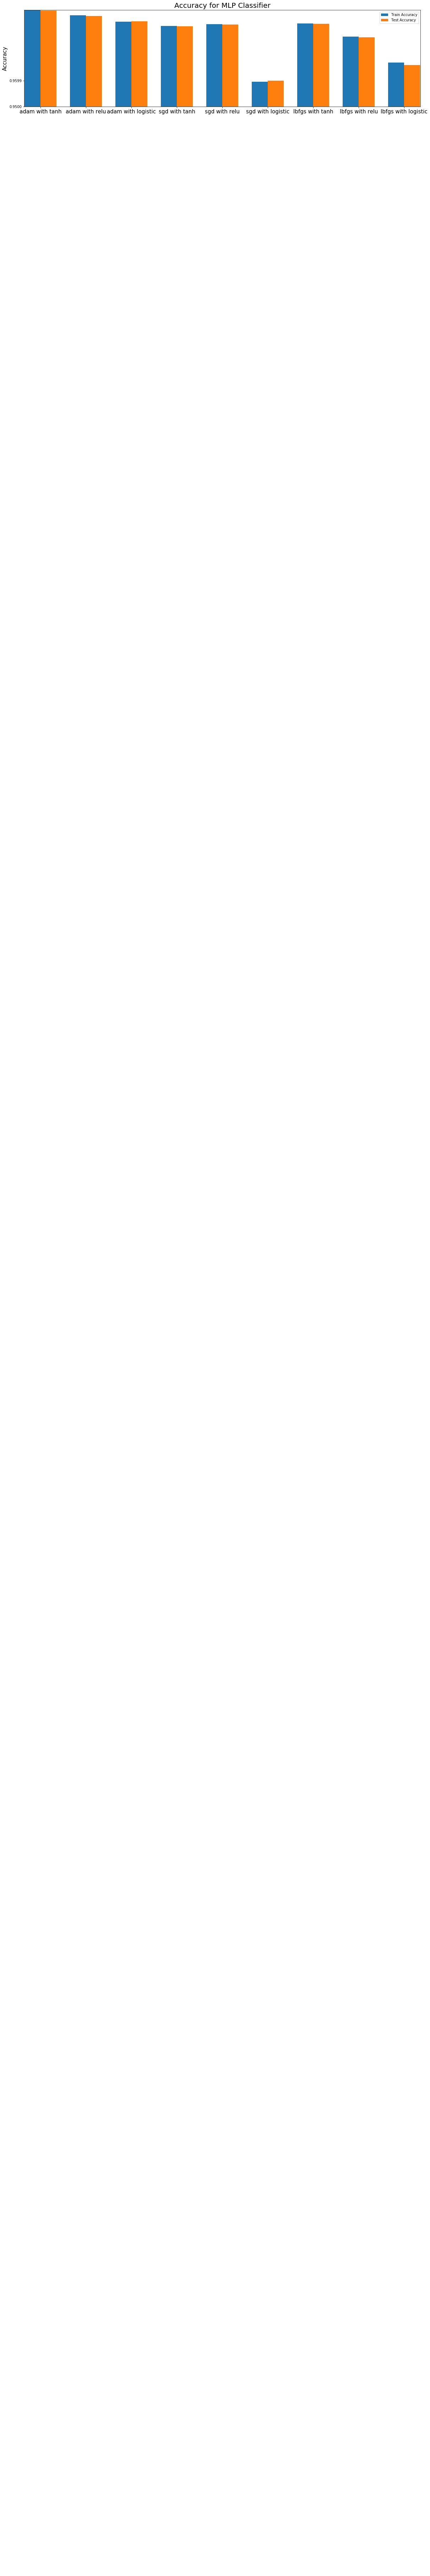

In [247]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np



x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (20,5))
rects1 = ax.bar(x - width/2, np.subtract(train_Acc,.95), width, label='Train Accuracy', bottom = .95)
rects2 = ax.bar(x + width/2, np.subtract(test_Acc,.95), width, label='Test Accuracy', bottom = .95)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy', fontsize = 15)
ax.margins(.001)
ax.set_title('Accuracy for MLP Classifier', fontsize = 20)
ax.set_yticks(np.arange(.95,.969,.0099))
ax.set_xticks(x)
ax.set_xticklabels(new, fontsize = 15)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [245]:
max(test_Acc)

0.98647

In [262]:
train_Acc

[0.98678,
 0.9847733333333333,
 0.9823233333333333,
 0.9806866666666667,
 0.98142,
 0.9593733333333333,
 0.9816733333333333,
 0.9766233333333333,
 0.9667633333333333]

In [259]:
test_Acc


[0.98647, 0.98451, 0.9825, 0.98055, 0.98121, 0.95984, 0.98156, 0.97642, 0.9658]

In [249]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [295]:
### BEST OF THE MLP CLASSIFIER

train_norm = scaler.fit_transform(data[:300000])
test_norm = scaler.transform(data[300000:])


mlp = MLPClassifier(solver = 'adam', activation = 'tanh', hidden_layer_sizes = (20,20,20))
mlp.fit(train_norm,train_y[:300000])
tainacc = mlp.score(train_norm,train_y[:300000])
valacc = mlp.score(test_norm,train_y[300000:])
y_preds = mlp.predict(test_norm)




In [296]:
print('The Training accuracy is {} and validation Accuracy {} is'.format(trainacc,valacc))

The Training accuracy is 1.0 and validation Accuracy 0.98616 is


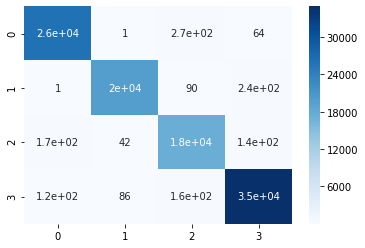

In [297]:
matrix = confusion_matrix(train_y[300000:],y_preds)
sns.heatmap(matrix, annot = True, cmap = 'Blues')

In [298]:
matrix

array([[26065,     1,   271,    64],
       [    1, 20031,    90,   243],
       [  169,    42, 17586,   143],
       [  118,    86,   156, 34934]])

In [299]:
a = np.sum(matrix, axis = 1)

In [277]:
f = np.divide(matrix,a.T)*100

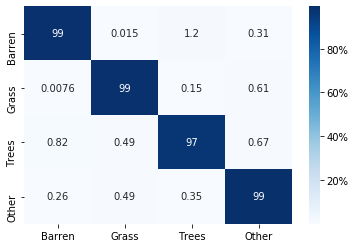

In [281]:
xticklabels = ['Barren', 'Grass', 'Trees', 'Other']
sns.heatmap(f, annot = True, cmap = 'Blues', xticklabels = xticklabels, yticklabels = xticklabels, cbar_kws={'format': '%.0f%%'})


In [300]:
import pickle
pickle.dump(mlp,open('mlp_model.sav','wb'))

In [304]:
raw = loadmat('sat-4-full.mat')

In [305]:
test_x = raw['test_x']
test_y = raw['test_y']

In [306]:
test_x.shape

(28, 28, 4, 100000)

In [308]:
test_y = np.argmax(test_y, axis = 0)

In [310]:
test_y.shape

(100000,)

In [311]:
test_x = test_x.T

In [313]:
test_x = test_x.reshape(100000,4,784)

In [314]:
test_data = np.zeros((100000,1))

for i in range(4):
    stack = np.mean(test_x[:,i,:],axis = 1).reshape(100000,-1)
    print(stack.shape)
    print(data.shape)
    test_data = np.hstack((test_data,stack))
    
print(data.shape)

(100000, 1)
(400000, 10)
(100000, 1)
(400000, 10)
(100000, 1)
(400000, 10)
(100000, 1)
(400000, 10)
(400000, 10)


In [315]:
test_data.shape

(100000, 5)

In [316]:
test_data = test_data[:,1:]

In [317]:
test_data.shape

(100000, 4)

In [318]:
y =[]
for i in range(test_data.shape[0]):
    y.append(colorsys.rgb_to_hsv(test_data[i,0],test_data[i,1],test_data[i,2]))
    
y = np.array(y).reshape(100000,3)
test_data = np.hstack((test_data,y))

In [319]:
test_data = np.hstack((test_data,np.std(test_x[:,3,:],axis = 1).reshape(100000,-1)))

In [325]:
## NDVI Computing

ndvi = np.divide(np.subtract(test_data[:,3],test_data[:,0]),np.add(test_data[:,3],test_data[:,0])).reshape(100000,-1)
test_data = np.hstack((test_data,ndvi))

In [326]:
## ARVI computing

arvi = np.divide(np.subtract(test_data[:,3],2*np.subtract(test_data[:,0],test_data[:,2])),np.subtract(test_data[:,3],2*np.add(test_data[:,0],test_data[:,2])))

test_data = np.hstack((test_data,arvi.reshape(100000,-1)))

In [327]:
test_data.shape

(100000, 10)

In [323]:
test_data  = test_data[:,:8]

In [354]:
test_test_norm = scaler.fit_transform(test_data)

In [355]:
mlp.score(test_test_norm,test_y)

0.98503

In [330]:
landuse = mlp.predict(test_test_norm)

In [331]:
landuse.shape

(100000,)

In [333]:
np.unique(landuse)

array([0, 1, 2, 3])

In [334]:
landuse = list(landuse)

In [340]:
my_dict = {0: 'barren land', 1 : 'trees', 2: 'grassland', 3: 'none'}

In [341]:
result = []

for i in landuse:
    result.append(my_dict[i])
    


In [343]:
len(result)

100000

In [346]:
import csv
with open('landuse.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(result)

In [347]:
testing_test = loadmat('test_x_only.mat')


In [351]:
testing_test['test_x'].shape

(28, 28, 4, 100000)

In [367]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,MaxPooling2D,Conv2D,Flatten

In [368]:

input_shape = (32, 16, 1)
num_classes = 4
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
 activation='relu', strides=2,
 input_shape=input_shape))
model.add(Conv2D(24, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
 optimizer=keras.optimizers.Adadelta(),
 metrics=['accuracy'])

In [369]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 15, 7, 32)         320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 3, 24)         19224     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 1, 24)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 3, 1, 24)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 72)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2336      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)               

In [374]:
data1 = loadmat('./sat-4-full.mat')

In [373]:
data1['annotations']

array([[array(['1000'], dtype='<U4'),
        array(['barren land'], dtype='<U11')],
       [array(['0100'], dtype='<U4'), array(['trees'], dtype='<U5')],
       [array(['0010'], dtype='<U4'), array(['grassland'], dtype='<U9')],
       [array(['0001'], dtype='<U4'), array(['none'], dtype='<U4')]],
      dtype=object)

In [416]:
data[3,:]

array([ 1.09562500e+02,  1.06979592e+02,  1.03971939e+02,  1.27181122e+02,
        8.96646133e-02,  5.10262291e-02,  1.09562500e+02,  3.73923673e+01,
        7.44206846e-02, -3.86811392e-01])

In [425]:
import colorsys

colorsys.rgb_to_hsv(109,106,103)

(0.08333333333333333, 0.05504587155963303, 109)